## TALLER 4: PREPARACIÓN DE DATOS

El presente taller presenta la preparación de una columna del conjunto de datos.

CONJUNTO DE DATOS: POKEMONS

El conjunto de datos presenta carácteristicas de los pokemones. Se toma este conjunto de datos para realizar el ejercicio de análisis dado que el conjunto de datos que se venía trabajando perdió relevacia en el último análisis. Se analizarán sólo los 10 primeros tipos de pokemones dada la gran cantidad de tipos. Por favor considere el análisis como un análisis de biología pokemón.

Importación de librerías

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from scipy.stats import skew, kurtosis, pearsonr

Carga de conjuntos

In [102]:
df = pd.read_csv('pokemon_combined.csv')

Revisión de columnas

In [3]:
df.columns

Index(['Name', 'Type', 'Species', 'Height', 'Weight', 'Abilities',
       'Catch rate', 'Base Friendship', 'Base Exp.', 'Growth Rate', 'Gender',
       'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

# ACERCAMIENTO INICIAL

In [4]:
df

,Name,Type,Species,Height,Weight,Abilities,Catch rate,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass Poison,Seed Pokémon,0.7,6.9,1. OvergrowChlorophyll (hidden ability),45,50,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45
1,Ivysaur,Grass Poison,Seed Pokémon,1.0,13.0,1. OvergrowChlorophyll (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60
2,Venusaur,Grass Poison,Seed Pokémon,2.4,155.5,Thick Fat,45,50,281,Medium Slow,"87.5% male, 12.5% female",80,100,123,122,120,80
3,Charmander,Fire,Lizard Pokémon,0.6,8.5,1. BlazeSolar Power (hidden ability),45,50,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65
4,Charmeleon,Fire,Flame Pokémon,1.1,19.0,1. BlazeSolar Power (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,Raging Bolt,Electric Dragon,Paradox Pokémon,5.2,480.0,1. Protosynthesis,10,0,0,Slow,Genderless,125,73,91,137,89,75
1010,Iron Boulder,Rock Psychic,Paradox Pokémon,1.5,162.5,1. Quark Drive,10,0,0,Slow,Genderless,90,120,80,68,108,124
1011,Iron Crown,Steel Psychic,Paradox Pokémon,1.6,156.0,1. Quark Drive,10,0,0,Slow,Genderless,90,72,100,122,108,98
1012,Terapagos,Normal,Tera Pokémon,1.7,77.0,Teraform Zero,255,0,0,Slow,"50% male, 50% female",160,105,110,130,110,85


In [5]:
df.describe()

,Height,Weight,Catch rate,Base Friendship,Base Exp.,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,1.356706,71.732249,94.411243,46.523669,151.075937,70.612426,79.608481,73.893491,71.715976,71.076923,68.119329
std,3.356350,132.212009,75.950220,18.637471,85.182049,27.659913,32.121431,30.854665,32.164407,27.826603,30.244717
min,0.100000,0.100000,3.000000,0.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,0.525000,8.625000,45.000000,50.000000,65.000000,50.000000,55.000000,50.000000,47.250000,50.000000,45.000000
50%,1.000000,28.650000,60.000000,50.000000,158.000000,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000
75%,1.600000,71.150000,140.000000,50.000000,187.000000,85.000000,100.000000,90.000000,91.000000,90.000000,90.000000
max,100.000000,999.900000,255.000000,140.000000,635.000000,255.000000,185.000000,250.000000,194.000000,250.000000,200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1014 non-null   object 
 1   Type             1014 non-null   object 
 2   Species          1014 non-null   object 
 3   Height           1014 non-null   float64
 4   Weight           1014 non-null   float64
 5   Abilities        1014 non-null   object 
 6   Catch rate       1014 non-null   int64  
 7   Base Friendship  1014 non-null   int64  
 8   Base Exp.        1014 non-null   int64  
 9   Growth Rate      1014 non-null   object 
 10  Gender           1014 non-null   object 
 11  HP               1014 non-null   int64  
 12  Attack           1014 non-null   int64  
 13  Defense          1014 non-null   int64  
 14  Sp. Atk          1014 non-null   int64  
 15  Sp. Def          1014 non-null   int64  
 16  Speed            1014 non-null   int64  
dtypes: float64(2),

In [7]:
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [8]:
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

Eliminación de variables

In [103]:
df.drop(['Name', 'Species', 'Abilities', 'Catch rate', 'Base Friendship', 'Base Exp.', 'Gender'], axis=1, inplace=True)

In [10]:
df.columns

Index(['Type', 'Height', 'Weight', 'Growth Rate', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

Tipo de las Variables a considerar para el análisis

| Columna | Descripción | Tipo |
|:-----:|:-----:|:-----:|
| Type | Tipo de Pokemón | Cualitativa Nominal |
| Height | Altura | Cuantitativa Discreta |
| Weight | Peso | Cuantitativa Discreta |
| Growth Rate | Tasa de crecimiento | Cualitativa Nominal |
| HP | Vida | Cuantitativa Discreta |
| Attack  | Ataque | Cauntitativa Discreta |
| Defense | Defensa | Cuantitativa Discreta |
| Sp. Atk | Velocidad de ataque | Cuantitativa Discreta |
| Speed  | Velocidad | Cuantitativa Discreta |

# Análisis univariado

Variables categóricas

Variable 'Type'

In [49]:
df.Type.value_counts(normalize=True).sort_values(ascending=False)

,proportion
Type,
Water,0.071992
Normal,0.063116
Grass,0.042406
Psychic,0.039448
Electric,0.030572
...,...
Bug Ground,0.000986
Flying Steel,0.000986
Normal Water,0.000986


Dado que existen 214 tipos de pokemones, se seleccionan solo los top 10 para el análisis.

In [104]:
top_10_types = df['Type'].value_counts().head(10)

def categorize_type(type_value):
  if type_value in top_10_types.index:
    return type_value
  else:
    return 'otros'

df['Type_Cat'] = df['Type'].apply(categorize_type)


In [51]:
df

,Type,Height,Weight,Growth Rate,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_Cat
0,Grass Poison,0.7,6.9,Medium Slow,45,49,49,65,65,45,otros
1,Grass Poison,1.0,13.0,Medium Slow,60,62,63,80,80,60,otros
2,Grass Poison,2.4,155.5,Medium Slow,80,100,123,122,120,80,otros
3,Fire,0.6,8.5,Medium Slow,39,52,43,60,50,65,Fire
4,Fire,1.1,19.0,Medium Slow,58,64,58,80,65,80,Fire
...,...,...,...,...,...,...,...,...,...,...,...
1009,Electric Dragon,5.2,480.0,Slow,125,73,91,137,89,75,otros
1010,Rock Psychic,1.5,162.5,Slow,90,120,80,68,108,124,otros
1011,Steel Psychic,1.6,156.0,Slow,90,72,100,122,108,98,otros
1012,Normal,1.7,77.0,Slow,160,105,110,130,110,85,Normal


Se eliminan las categorías de la columna 'Type' que están por fuera del top 10.

In [105]:
df = df[df['Type_Cat'] != 'otros']


In [53]:
df

,Type,Height,Weight,Growth Rate,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type_Cat
3,Fire,0.6,8.5,Medium Slow,39,52,43,60,50,65,Fire
4,Fire,1.1,19.0,Medium Slow,58,64,58,80,65,80,Fire
6,Water,0.5,9.0,Medium Slow,44,48,65,50,64,43,Water
7,Water,1.0,22.5,Medium Slow,59,63,80,65,80,58,Water
8,Water,1.6,101.1,Medium Slow,79,103,120,135,115,78,Water
...,...,...,...,...,...,...,...,...,...,...,...
951,Water,1.3,60.2,Slow,70,45,40,45,40,75,Water
952,Water,1.8,97.4,Slow,100,160,97,106,87,100,Water
965,Water,12.0,220.0,Slow,150,100,115,65,65,35,Water
970,Normal,4.5,47.4,Medium Fast,125,100,80,85,75,55,Normal


In [106]:
df.Type_Cat.value_counts(normalize=True).sort_values(ascending=False)

,proportion
Type_Cat,
Water,0.196765
Normal,0.172507
Grass,0.115903
Psychic,0.107817
Electric,0.083558
Fire,0.072776
Fighting,0.072776
Normal Flying,0.067385
Bug,0.059299


<Axes: title={'center': 'Tipo de pokemón'}, xlabel='Type_Cat'>

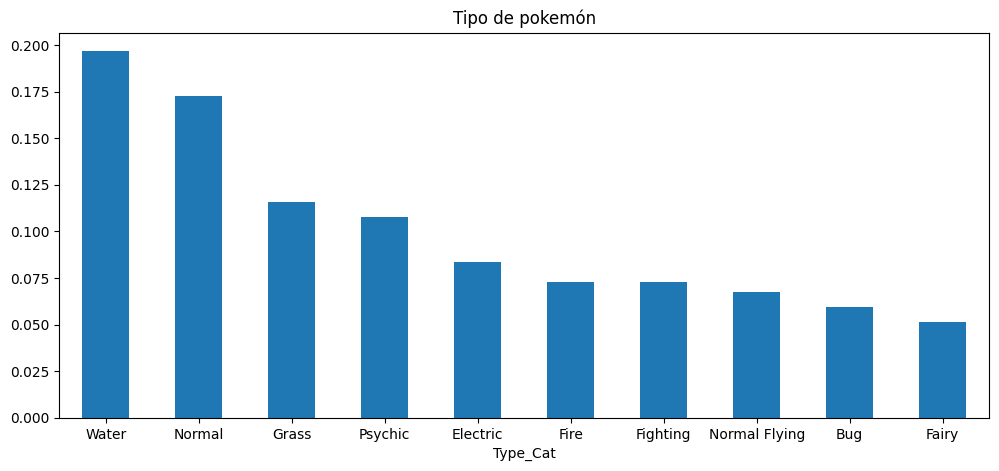

In [55]:
plt.figure(figsize=(12,5))
df.Type_Cat.value_counts(normalize=True).plot.bar(title = "Tipo de pokemón",rot=0)

Variable 'Growth Rate'

In [107]:
df.rename(columns={'Growth Rate': 'Growth_Rate'}, inplace=True)

In [19]:
df.Growth_Rate.value_counts(normalize=True).sort_values(ascending=False)

,proportion
Growth_Rate,
Medium Fast,0.396226
Medium Slow,0.315364
Slow,0.140162
Fast,0.094340
Erratic,0.035040
Fluctuating,0.018868


<Axes: title={'center': 'Tasa de crecimiento'}, xlabel='Growth_Rate'>

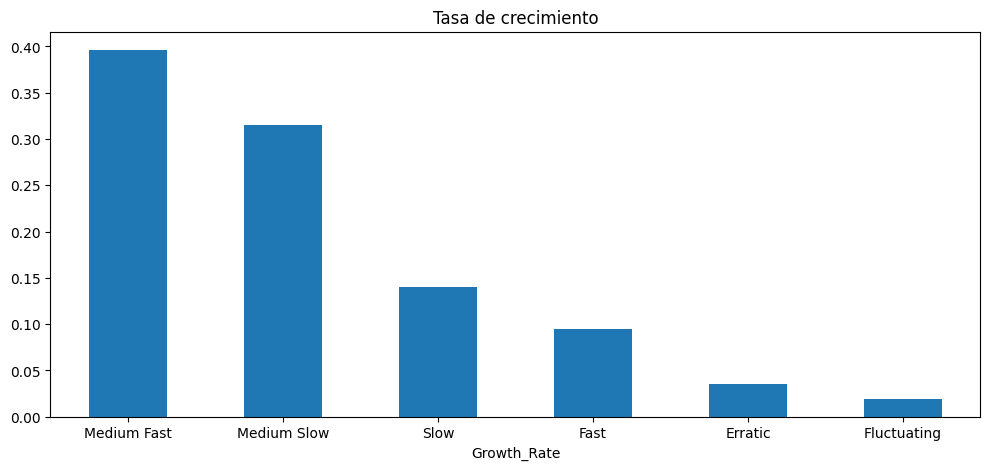

In [20]:
plt.figure(figsize=(12,5))
df.Growth_Rate.value_counts(normalize=True).plot.bar(title = "Tasa de crecimiento",rot=0)

## Conclusión

El tipo más frecuente de pokemón es de tipo agua, cercano al 20% del top 10 de tipos. Seguido se encuenra el tipo normal y el tipo hierva con 17,2% y 11,5% respectivamente. A su vez, la tasa de crecimiento más frecuente en el top 10 de tipos de pokemón es medio-rápida 39,6%, mientras que las tasas erratica y fluctuante tienen una frecuencia observada de 3,5% y 1,8% respectivamente. Se puede decir que las observaciones de pokemones que crecen con estas tasas son escazas.

Variables discretas

In [21]:
df.columns

Index(['Type', 'Height', 'Weight', 'Growth_Rate', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Type_Cat'],
      dtype='object')

In [108]:
df.rename(columns={'Sp. Atk': 'Sp_Atk', 'Sp. Def': 'Sp_Def'}, inplace=True)

In [28]:
tabla_descriptivas(df['Height'])

,Height
count,371.000000
mean,1.023720
std,1.276959
min,0.100000
25%,0.400000
50%,0.700000
75%,1.200000
max,14.500000
coef. variation,1.247372
skew,6.580051


In [29]:
tabla_descriptivas(df['Weight'])

,Weight
count,371.000000
mean,38.292453
std,76.673139
min,0.100000
25%,6.000000
50%,18.000000
75%,39.600000
max,999.900000
coef. variation,2.002304
skew,7.133525


In [30]:
tabla_descriptivas(df['HP'])

,HP
count,371.000000
mean,67.253369
std,29.343731
min,10.000000
25%,49.500000
50%,61.000000
75%,78.500000
max,255.000000
coef. variation,0.436316
skew,2.227296


In [31]:
tabla_descriptivas(df['Attack'])

,Attack
count,371.000000
mean,70.973046
std,28.989175
min,5.000000
25%,50.000000
50%,65.000000
75%,89.000000
max,160.000000
coef. variation,0.408453
skew,0.448686


In [32]:
tabla_descriptivas(df['Defense'])

,Defense
count,371.000000
mean,62.727763
std,23.415143
min,5.000000
25%,45.000000
50%,60.000000
75%,75.000000
max,140.000000
coef. variation,0.373282
skew,0.617888


In [33]:
tabla_descriptivas(df['Sp_Atk'])

,Sp_Atk
count,371.000000
mean,65.636119
std,29.772374
min,10.000000
25%,40.000000
50%,60.000000
75%,85.000000
max,194.000000
coef. variation,0.453597
skew,0.945706


In [34]:
tabla_descriptivas(df['Sp_Def'])

,Sp_Def
count,371.000000
mean,64.293801
std,25.517401
min,20.000000
25%,45.000000
50%,60.000000
75%,80.000000
max,160.000000
coef. variation,0.396887
skew,0.793676


In [35]:
tabla_descriptivas(df['Speed'])

,Speed
count,371.000000
mean,65.123989
std,29.594388
min,5.000000
25%,44.500000
50%,63.000000
75%,85.000000
max,200.000000
coef. variation,0.454431
skew,0.696777


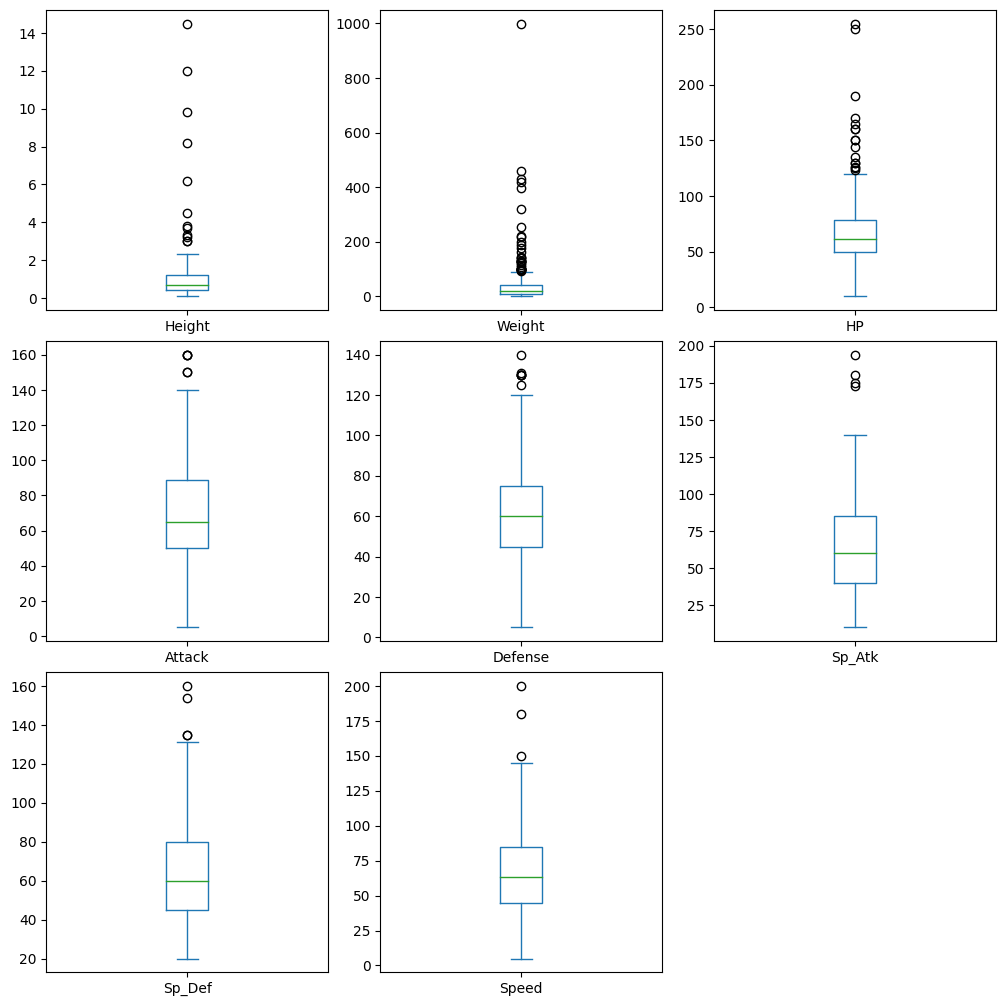

In [40]:
plt.subplot(331)
df['Height'].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)

plt.subplot(332)
df['Weight'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(333)
df['HP'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(334)
df['Attack'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(335)
df['Defense'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(336)
df['Sp_Atk'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(337)
df['Sp_Def'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(338)
df['Speed'].plot.box()
plt.tight_layout(pad=0.5)
plt.show()

Conclusión

Todas las vaiables discretas presentan sesgo positivo. Las variables 'Height', 'Weight', y 'HP' tienen un nivel de asimetría muy alto, observable en las gráficas con muchos outliers, en relación a las demás vaiables. La variable 'Weight' es la variable con el mayor  asimetría (7.13) con forma lepticúrtica (gran concentración de los datos o puntiaguda). La variable 'Attack' es la variable con mayor simetría del conjunto de variables (0.44) con concentración de los datos (kurtosis) normal (0.02).

# ANÁLISIS MULTIVARIADO

Hipótesis:

* Los pokemones más grandes (Height y Weight) son más fuertes (Attack y Defense)

* Los pokemones más pequeños (Height y Weight) son más rápidos (Speed)

* Los pokemones de tipo diferente a 'normal' tienen mayor ataque (Attack)

In [109]:
df_cuan = df.drop(['Type', 'Growth_Rate', 'Type_Cat'], axis=1)

Eliminación de outliers

In [110]:
def impute_outliers_IQR(df_cuan):
   q1=df_cuan.quantile(0.25)
   q3=df_cuan.quantile(0.75)
   IQR=q3-q1
   upper = df_cuan[~(df_cuan>(q3+1.5*IQR))].max()
   lower = df_cuan[~(df_cuan<(q1-1.5*IQR))].min()

   df_cuan = np.where(df_cuan > upper, # donde sea mayor
       df_cuan.mean(),             # colocamos la media
       np.where(              # en otros caso:
           df_cuan < lower,        # Cuando sea menor a lower
           df_cuan.mean(),         # colocamos la media
           df_cuan                 # el resto de las veces dejamos el valor como estaba
           )
       )
   return df_cuan

In [111]:
df_cuan['Height'] = impute_outliers_IQR(df_cuan['Height'])
df_cuan['Weight'] = impute_outliers_IQR(df_cuan['Weight'])
df_cuan['HP'] = impute_outliers_IQR(df_cuan['Weight'])

In [112]:
df_cuan.describe()

,Height,Weight,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.854136,23.557550,22.673420,70.973046,62.727763,65.636119,64.293801,65.123989
std,0.494765,21.386447,19.960455,28.989175,23.415143,29.772374,25.517401,29.594388
min,0.100000,0.100000,0.100000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,0.400000,6.000000,6.000000,50.000000,45.000000,40.000000,45.000000,44.500000
50%,0.700000,18.000000,18.000000,65.000000,60.000000,60.000000,60.000000,63.000000
75%,1.200000,38.292453,36.250000,89.000000,75.000000,85.000000,80.000000,85.000000
max,2.300000,90.000000,86.400000,160.000000,140.000000,194.000000,160.000000,200.000000


Escalado de los datos

In [113]:
scaler = StandardScaler()
df_cuan = scaler.fit_transform(df_cuan)

In [114]:
df_cuan = pd.DataFrame(df_cuan, columns=['Height', 'Weight', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'])
df_cuan

,Height,Weight,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,-0.514344,-0.705021,-0.711034,-0.655371,-0.843659,-0.189563,-0.560915,-0.004195
1,0.497601,-0.213392,-0.184283,-0.240864,-0.202183,0.483108,0.027713,0.503342
2,-0.716733,-0.681610,-0.685951,-0.793540,0.097172,-0.525898,-0.011529,-0.748583
3,0.295212,-0.049516,-0.008700,-0.275407,0.738649,-0.021395,0.616341,-0.241046
4,1.509546,0.689914,0.783556,1.106282,2.449252,2.332953,1.989806,0.435670
...,...,...,...,...,...,...,...,...
366,0.902379,1.715663,1.882585,-0.897167,-0.971955,-0.694066,-0.953334,0.334163
367,1.914324,0.689914,0.783556,3.075189,1.465655,1.357580,0.891034,1.180058
368,0.343218,0.689914,0.783556,1.002655,2.235426,-0.021395,0.027713,-1.019270
369,0.343218,1.116345,1.240451,1.002655,0.738649,0.651276,0.420131,-0.342553


In [115]:
df_cuan.describe()

,Height,Weight,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
count,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02,3.710000e+02
mean,2.872814e-16,-2.872814e-17,-9.576048e-18,1.915210e-16,1.627928e-16,-5.266826e-17,-1.843389e-16,-1.328677e-16
std,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00,1.001350e+00
min,-1.526289e+00,-1.098323e+00,-1.132434e+00,-2.278855e+00,-2.468732e+00,-1.871240e+00,-1.738171e+00,-2.034345e+00
25%,-9.191222e-01,-8.220748e-01,-8.364507e-01,-7.244556e-01,-7.581292e-01,-8.622335e-01,-7.571247e-01,-6.978296e-01
50%,-3.119553e-01,-2.602141e-01,-2.344501e-01,-2.063223e-01,-1.166530e-01,-1.895626e-01,-1.684967e-01,-7.186692e-02
75%,6.999897e-01,6.899137e-01,6.810924e-01,6.226910e-01,5.248232e-01,6.512759e-01,6.163406e-01,6.725211e-01
max,2.926268e+00,3.110950e+00,3.196953e+00,3.075189e+00,3.304553e+00,4.317332e+00,3.755690e+00,4.563641e+00


<Axes: >

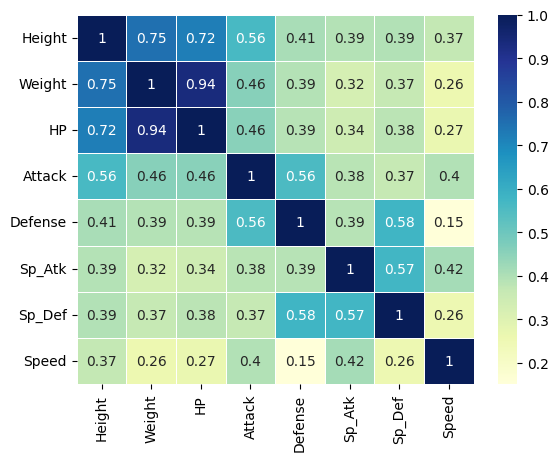

In [117]:
correlation_mat = df_cuan.corr()
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

Conclusión

No existe relación fuerte entre el tamaño del pokemón y su ataque y defensa. Sin embargo, según el heatmap, sí existe relación entre el peso y la altura y la vida del pokemón. Entre más grande el pokemón, mayor vida tendrá.

No existe evidencia para decir que un pokemón pequeño es más rápido que uno grande.

Agrupación de datos para comparar los tipo de pokemones normal vs los demás y su relación con el ataque

In [120]:
df_normal = df[['Type', 'Attack']]
df_normal

,Type,Attack
3,Fire,52
4,Fire,64
6,Water,48
7,Water,63
8,Water,103
...,...,...
951,Water,45
952,Water,160
965,Water,100
970,Normal,100


In [125]:
df_dum = pd.get_dummies(df_normal, columns=['Type'], prefix=['Type_es'])
df_dum.dtypes

,0
Attack,int64
Type_es_Bug,bool
Type_es_Electric,bool
Type_es_Fairy,bool
Type_es_Fighting,bool
Type_es_Fire,bool
Type_es_Grass,bool
Type_es_Normal,bool
Type_es_Normal Flying,bool
Type_es_Psychic,bool


In [126]:
df_dum

,Attack,Type_es_Bug,Type_es_Electric,Type_es_Fairy,Type_es_Fighting,Type_es_Fire,Type_es_Grass,Type_es_Normal,Type_es_Normal Flying,Type_es_Psychic,Type_es_Water
3,52,False,False,False,False,True,False,False,False,False,False
4,64,False,False,False,False,True,False,False,False,False,False
6,48,False,False,False,False,False,False,False,False,False,True
7,63,False,False,False,False,False,False,False,False,False,True
8,103,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
951,45,False,False,False,False,False,False,False,False,False,True
952,160,False,False,False,False,False,False,False,False,False,True
965,100,False,False,False,False,False,False,False,False,False,True
970,100,False,False,False,False,False,False,True,False,False,False


In [123]:
##df_dum.drop(['Type_es_Water'], axis=1, inplace=True)
## Quise borrar la última columna debido a los efectos que mencionó el profesor en la clase sobre la multicolinearidad pero no encontré sus efectos en los datos.

In [127]:
df_dum.corr()['Attack']

,Attack
Attack,1.000000
Type_es_Bug,-0.209879
Type_es_Electric,0.018786
Type_es_Fairy,-0.060606
Type_es_Fighting,0.250436
Type_es_Fire,0.020332
Type_es_Grass,-0.031366
Type_es_Normal,0.086182
Type_es_Normal Flying,0.032191
Type_es_Psychic,-0.181896


Conclusión

No existe relación entre el tipo del pokemón (ninguno) y su ataque.

## CONCLUSIONES

Existen más de 200 tipos de pokemones y por ende el análisis se centró en los 10 tipos más frecuentes. Los tipos más frecuentes son: agua,	normal,	hierva, psíquico,	eléctrico, fuego, volador,	normal volador, insecto, hada.

En el top 10 de tipos, podemos concluír que existen pokemones enormes, muy por fuera de lo normal. Esto se refleja en el alto nivel de asimetría de las varibales que determian el tamaño del pokemón (altura, peso y vida).

Se encontró que a mayor tamaño (altura y peso) mayor vida tiene el pokemón.

El tamaño no tiene ninguna relación con su capacidad de atque o defensa.

El tamaño no tiene ninguna relación con su velocidad.

El tipo de pokemón no tiene ningún efecto en su capacidad de ataque.

